In [213]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [214]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [215]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'loc', 'kg', 'hang', 'core',
       'block', 'arc', 'anta', 'legs', 'L-Sit', 'tech', 'speed+', 'notes',
       'stable', 'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a',
       '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+', '4F2G', '3F2G', '16',
       '12', '15°', '35°', '45°', 'sloper', 'pinch', '2F2G'],
      dtype='object')

In [216]:
boulder_4 = 4
boulder_5a = 8
boulder_5b = 9
boulder_5c = 10

boulder_6a = 20
boulder_6a_plus = 21
boulder_6b = 30

boulder_6b_plus = 40
boulder_6c = 60
boulder_6c_plus = 70

boulder_7a = 100
boulder_7a_plus = 130

scores_translator = {
    # climbing
    '4': boulder_4,   
    '5a': boulder_5a,
    '5b': boulder_5b,
    '5c': boulder_5c,
    '6a': boulder_6a,
    '6a+': boulder_6a_plus,
    '6b': boulder_6b,
    '6b+': boulder_6b_plus,
    '6c': boulder_6c,
    '6c+': boulder_6c_plus,
    '7a': boulder_7a,
    '7a+': boulder_7a_plus,
    
    # gymnastics
    'block': boulder_6a_plus / 5,
    'core': boulder_6a / 5,
    'anta': boulder_5c / 5,
    'legs': boulder_5c / 5,
    'L-Sit': boulder_6b,
    
    # speed
    'speed+': boulder_7a / 5,
    
    # ARC
    'arc': boulder_6b_plus / 5,
    
    # technique
    'tech': boulder_6a_plus / 5,
    
    # Hangboard for each 10 seconds
    '4F2G': boulder_5c / 10,
    '3F2G': boulder_6a / 10,
    '2F2G': boulder_6a_plus / 10,
    
    # crimp in mm
    '16': boulder_6a_plus / 10,
    '12': boulder_6b_plus / 10,
    
    # slopers
    'sloper': boulder_6a / 10,
    '15°': boulder_6a / 10,
    '35°': boulder_6b_plus / 10,
    '45°': boulder_7a / 10,
    
    'pinch': boulder_6b_plus / 10,
}

hangboard = [
    '4F2G',
    '3F2G',
    '2F2G',
    '16',
    '12',
    'sloper',
    '15°',
    '35°',
    '45°',
    'pinch'
]

gymnastics = ['block', 'core', 'anta', 'legs', 'L-Sit',]
climbing = ['4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+',]


def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)


def calc_hangboard_scores(row):
    s = [row[key] * scores_translator[key] for key in hangboard]
    return sum(s)
        
    
def calc_gym_scores(row):
    s = [row[key] * scores_translator[key] for key in gymnastics]
    return sum(s)

def calc_climbing_scores(row):
    s = [row[key] * scores_translator[key] for key in climbing]
    return sum(s)

def calc_arc_scores(row):
    s = [row[key] * scores_translator[key] for key in ['arc']]
    return sum(s)

def calc_technique_scores(row):
    s = [row[key] * scores_translator[key] for key in ['tech']]
    return sum(s)

def calc_speed_scores(row):
    s = [row[key] * scores_translator[key] for key in ['speed+']]
    return sum(s)

In [217]:
scores = sessions.apply(calc_score, axis=1)
hangboard_scores = sessions.apply(calc_hangboard_scores, axis=1)
gym_scores = sessions.apply(calc_gym_scores, axis=1)
climbing_scores = sessions.apply(calc_climbing_scores, axis=1)
arc_scores = sessions.apply(calc_arc_scores, axis=1)
tech_scores = sessions.apply(calc_technique_scores, axis=1)
speed_scores = sessions.apply(calc_speed_scores, axis=1)

sessions['scores'] = scores
sessions['hang_scores'] = hangboard_scores
sessions['gym_scores'] = gym_scores
sessions['climbing_scores'] = climbing_scores
sessions['arc_scores'] = arc_scores
sessions['tech_scores'] = tech_scores
sessions['speed_scores'] = speed_scores

In [218]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

# Doripa: Five last entries

In [219]:
doripa.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
45,491.0,0.0,534.0,750.0,0.0
47,359.0,184.8,418.4,0.0,0.0
48,616.0,453.6,963.6,810.0,0.0
49,731.0,630.0,958.0,0.0,0.0
51,355.0,546.0,618.0,682.0,0.0


# Doripa: Maximal sessions

In [220]:
doripa[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    1357.0
tech_scores         630.0
gym_scores          963.6
hang_scores         810.0
arc_scores          400.0
dtype: float64

# Sunshine: Last five scores

In [221]:
sunshine_sessions.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
40,451.0,0.0,0.0,336.0,0.0
43,0.0,0.0,0.0,396.0,0.0
44,279.0,0.0,412.0,453.0,0.0
46,230.0,155.4,0.0,0.0,0.0
50,325.0,420.0,452.0,438.0,0.0


# Sunshine: Maximal Sessions

In [222]:
sunshine_sessions[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    556.0
tech_scores        420.0
gym_scores         452.0
hang_scores        453.0
arc_scores           0.0
dtype: float64

In [223]:
def plot_stacked_scores(athlete):
    plt.figure(figsize=(20,10))
    
    x = np.arange(len(athlete))
    
    athlete['additional_index'] = x
    scores = [
        athlete.climbing_scores,

        athlete.tech_scores,
        athlete.speed_scores,

        athlete.gym_scores,
        athlete.arc_scores,

        athlete.hang_scores,
    ]
    
    labels = ['Climbing', 'Technique', 'Speed', 'Gymnastics', 'ARC', 'Hangboarding',  ]
    colors = [ 'cornflowerblue','mediumorchid', 'gray', 'gold', 'red', 'lightgreen', ]

    y = np.vstack(scores)
    plt.stackplot(x, y, labels=labels, colors=colors)
    plt.plot(x, athlete.scores, marker='o', color='lightgray')

    for index, row in athlete.iterrows():
        if row.notes:
            plt.annotate(row.notes, xy=(row.additional_index, row.scores), fontsize=14)
            
    plt.legend(loc=2)
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


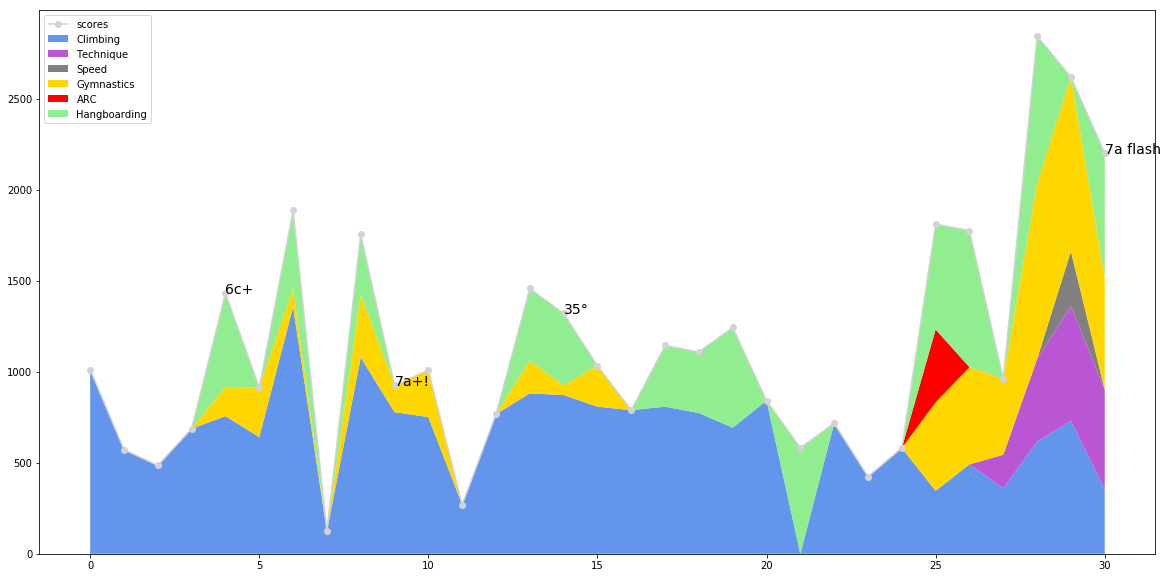

In [224]:
plot_stacked_scores(doripa)

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


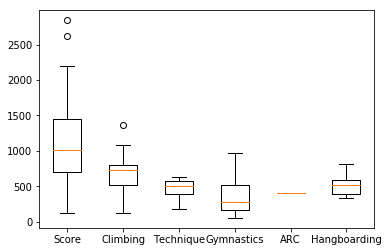

In [225]:
scores = [
    doripa[doripa.scores > 0].scores,
    doripa[doripa.climbing_scores > 0].climbing_scores,

    doripa[doripa.tech_scores > 0].tech_scores,
    doripa[doripa.gym_scores > 0].gym_scores,
    doripa[doripa.arc_scores > 0].arc_scores,

    doripa[doripa.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


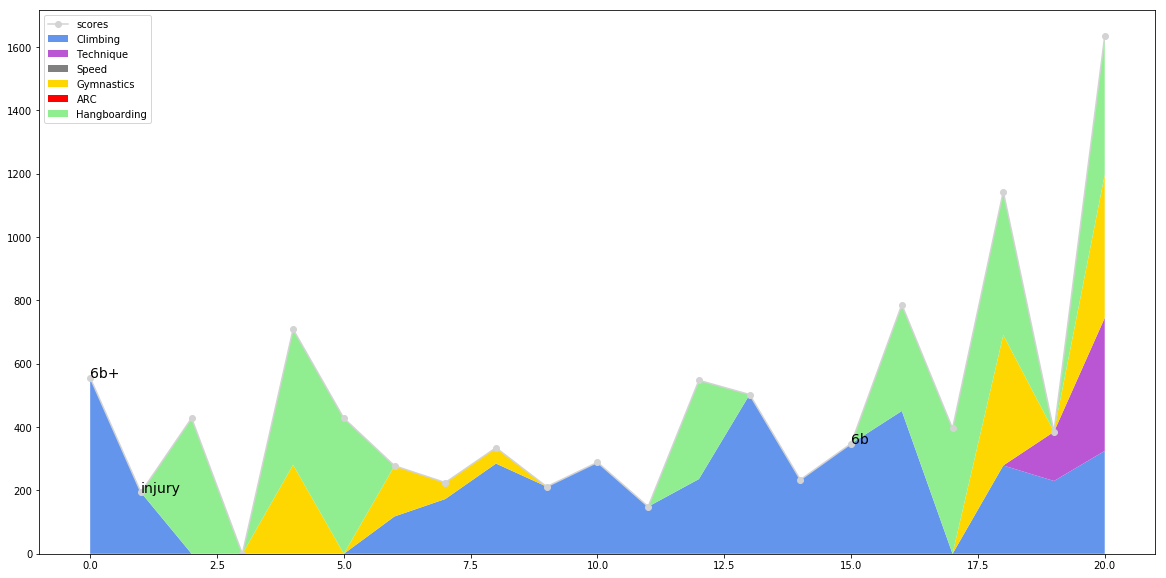

In [226]:
plot_stacked_scores(sunshine_sessions)


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


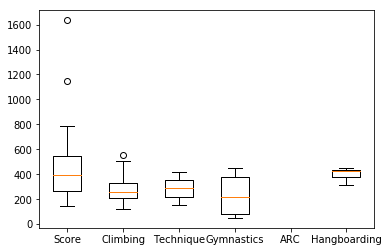

In [227]:
scores = [
    sunshine_sessions[sunshine_sessions.scores > 0].scores,
    sunshine_sessions[sunshine_sessions.climbing_scores > 0].climbing_scores,

    sunshine_sessions[sunshine_sessions.tech_scores > 0].tech_scores,
    sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores,
    sunshine_sessions[sunshine_sessions.arc_scores > 0].arc_scores,

    sunshine_sessions[sunshine_sessions.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()
# plt.boxplot(sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores)

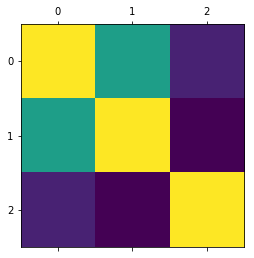

In [228]:
plt.matshow(doripa[['total', 'total6', 'scores']].corr());

In [229]:
doripa[['total', 'total6', 'scores']].corr()

,total,total6,scores
total,1.000000,0.679853,0.341049
total6,0.679853,1.000000,0.271971
scores,0.341049,0.271971,1.000000


In [230]:
doripa['total'].corr(doripa['total6'])

0.6798526767308956

In [231]:
doripa['total'].corr(doripa['scores'])

0.3410485857100004

In [232]:
doripa['scores'].corr(doripa['total6'])

0.2719713051392348

In [233]:
sunshine_sessions.corr()['scores']

cycle               0.141330
kg                 -0.082512
hang                0.517209
core                0.808193
block               0.834719
arc                      NaN
anta                0.383213
legs               -0.081883
L-Sit               0.129384
tech                0.679348
speed+                   NaN
total               0.183646
total6              0.177338
4                   0.080677
5a                 -0.053374
5b                  0.283298
5c                  0.132957
6a                  0.080290
6a+                 0.049328
6b                 -0.011515
6b+                 0.557781
6c                  0.198712
6c+                      NaN
7a                  0.589786
7a+                      NaN
4F2G                0.187267
3F2G                0.632067
16                  0.214659
12                  0.731108
15°                 0.605727
35°                 0.794596
45°                      NaN
sloper              0.051323
pinch                    NaN
2F2G          

In [234]:
doripa.corr()['scores']

cycle               0.266803
kg                 -0.338948
hang                0.561016
core                0.833940
block               0.728836
arc                 0.190984
anta                0.338765
legs                0.393314
L-Sit               0.088003
tech                0.691455
speed+              0.420362
total               0.341049
total6              0.271971
4                   0.216374
5a                 -0.036936
5b                  0.254836
5c                  0.143410
6a                  0.305408
6a+                -0.072272
6b                  0.150782
6b+                 0.321755
6c                  0.050779
6c+                 0.034965
7a                  0.136477
7a+                -0.125150
4F2G                0.473548
3F2G                0.490121
16                  0.169432
12                  0.581178
15°                 0.084632
35°                 0.601601
45°                 0.301699
sloper                   NaN
pinch               0.208481
2F2G          